In [1]:
import pandas as pd
import requests

# Pfad zur DEG-Datei
deg_file_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/differentially_expressed_genes.txt'

# Datei laden
deg_data = pd.read_csv(deg_file_path, sep='\t', header=None)

# Gen-IDs aus der Datei extrahieren
deg_gene_ids = deg_data.iloc[:, 0]

# Ensembl-REST-API-URL für die Konvertierung von Ensembl-Gene-IDs in Gene-Namen
url = "https://rest.ensembl.org/lookup/id"

# Gen-Namen abfragen und in ein Dictionary speichern
gene_id_to_name = {}
for gene_id in deg_gene_ids:
    response = requests.get(f"{url}/{gene_id}", headers={"Content-Type": "application/json"})
    data = response.json()
    if "display_name" in data:
        gene_id_to_name[gene_id] = data["display_name"]

# Übersetzen der Gen-IDs in Gen-Namen in Ihrer DEG-Datei
deg_data['gene_name'] = deg_data.iloc[:, 0].map(gene_id_to_name)

# Filtern der Daten, um Zeilen mit fehlenden Gen-Namen oder "MT-" zu entfernen
filtered_deg_data = deg_data.dropna(subset=['gene_name'])
filtered_deg_data = filtered_deg_data[~filtered_deg_data['gene_name'].str.startswith("MT-")]

# Ausgabe der gefilterten DEG-Daten mit Gen-Namen
print(filtered_deg_data)
# Pfad zum Ausgabe-Datei
output_file_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'

# Speichern der gefilterten DEG-Daten in einer CSV-Datei
filtered_deg_data.to_csv(output_file_path, index=False)

                    0          1 gene_name
0     ENSG00000115541   7.178152     HSPE1
1     ENSG00000164032   8.150967     H2AZ1
2     ENSG00000197451   3.845227   HNRNPAB
3     ENSG00000145494   4.307888    NDUFS6
4     ENSG00000239672   3.163343      NME1
...               ...        ...       ...
2796  ENSG00000175061  -6.440651    SNHG29
2797  ENSG00000234741 -13.985456      GAS5
2798  ENSG00000177410 -17.831900     ZFAS1
2799  ENSG00000176171  -9.624695     BNIP3
2800  ENSG00000122884  -5.219403     P4HA1

[2692 rows x 3 columns]


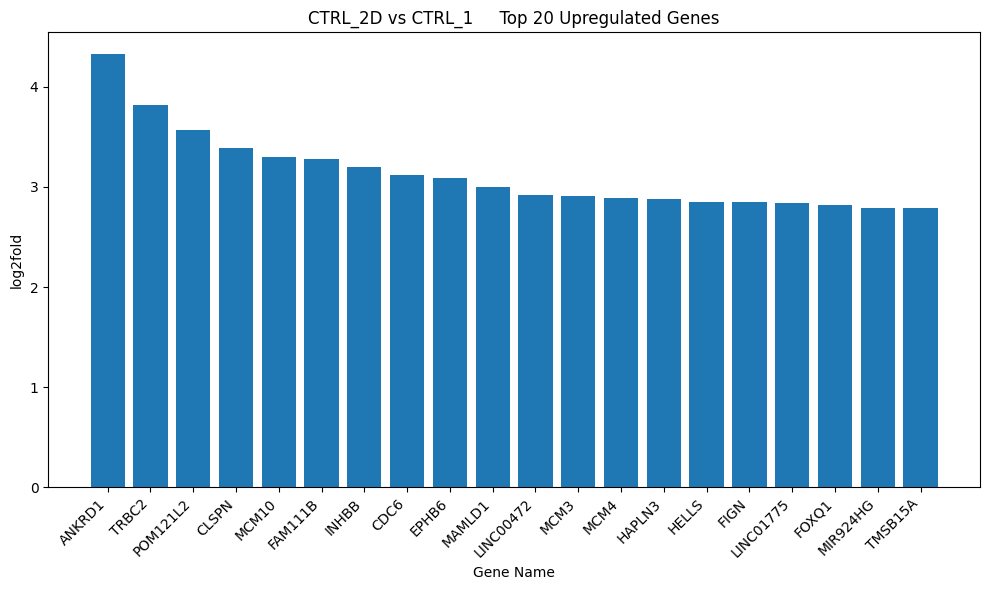

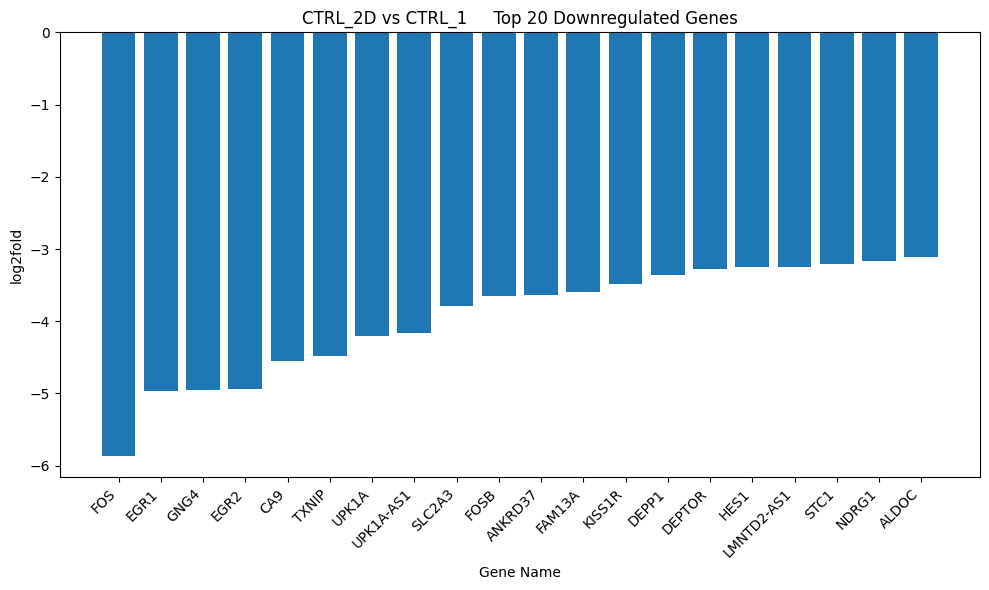

In [2]:
import os
import matplotlib.pyplot as plt

# Ersetze 'dein/verzeichnis/pfad' durch den gewünschten Pfad auf deinem System
output_directory = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/'

# Erstellen eines Verzeichnisses für die Plots, falls es nicht existiert
plots_directory = os.path.join(output_directory, 'plots')
if not os.path.exists(plots_directory):
    os.makedirs(plots_directory)

# Sortieren der Daten nach Expression Value
sorted_upregulated = filtered_deg_data[filtered_deg_data[1] > 0].sort_values(by=1, ascending=False).head(20)
sorted_downregulated = filtered_deg_data[filtered_deg_data[1] < 0].sort_values(by=1, ascending=True).head(20)

# Erstellen eines Bar-Plots der Top 20 hochregulierten Gene
plt.figure(figsize=(10, 6))
plt.bar(sorted_upregulated['gene_name'], sorted_upregulated[1])
plt.xlabel('Gene Name')
plt.ylabel('log2fold')
plt.title('CTRL_2D vs CTRL_1     Top 20 Upregulated Genes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Speichern des Plots im Verzeichnis
upregulated_plot_path = os.path.join(plots_directory, 'upregulated_genes_plot.png')
plt.savefig(upregulated_plot_path)

# Erstellen eines Bar-Plots der Top 20 herunterregulierten Gene
plt.figure(figsize=(10, 6))
plt.bar(sorted_downregulated['gene_name'], sorted_downregulated[1])
plt.xlabel('Gene Name')
plt.ylabel('log2fold')
plt.title('CTRL_2D vs CTRL_1     Top 20 Downregulated Genes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Speichern des Plots im Verzeichnis
#downregulated_plot_path = os.path.join(plots_directory, 'downregulated_genes_plot.png')
#plt.savefig(downregulated_plot_path)
# Speicherpfad für das Plot-Bild
output_folder = '/storage/users/sac43cg/res_Samantha_1/outs/Figures'
output_filename = os.path.join(output_folder, 'up_down_CTRL1_vs_CTRL2D.png')

# Überprüfen, ob der Ausgabeordner vorhanden ist, andernfalls erstellen
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Speichern des Plots im angegebenen Ordner
plt.savefig(output_filename, dpi=600)
# Anzeigen der Plots
plt.show()

/tmp/ipykernel_457204/1651491519.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  up_color = plt.cm.get_cmap('Reds')(np.linspace(1, 0.2, len(sorted_upregulated)))
/tmp/ipykernel_457204/1651491519.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  down_color = plt.cm.get_cmap('Blues')(np.linspace(1, 0.2, len(sorted_downregulated)))
/tmp/ipykernel_457204/1651491519.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  up_legend_color = plt.cm.get_cmap('Blues')(1)
/tmp/ipyke

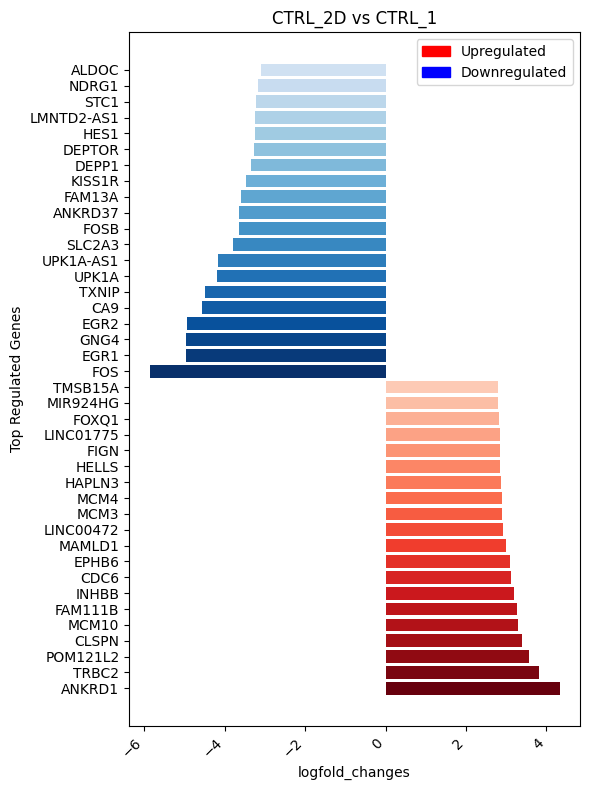

In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import os
import numpy as np

# Pfad zur CSV-Datei
csv_file_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
output_folder = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/'

# CSV-Datei einlesen
data = pd.read_csv(csv_file_path)

# Sortieren der Daten nach Expression Value
# Sortieren der Daten nach Expression Value
sorted_upregulated = filtered_deg_data[filtered_deg_data[1] > 0].sort_values(by=1, ascending=False).head(20)
sorted_downregulated = filtered_deg_data[filtered_deg_data[1] < 0].sort_values(by=1, ascending=True).head(20)

# Erstellen eines gemeinsamen Balkendiagramms für hoch- und herunterregulierte Gene
plt.figure(figsize=(6, 8))

# Farbverlauf von Blau zu Weiß für hochregulierte Gene
up_color = plt.cm.get_cmap('Reds')(np.linspace(1, 0.2, len(sorted_upregulated)))

# Farbverlauf von Rot zu Weiß für herunterregulierte Gene
down_color = plt.cm.get_cmap('Blues')(np.linspace(1, 0.2, len(sorted_downregulated)))

# Hochregulierte Gene (Farbverlauf von Blau zu Weiß)
plt.barh(sorted_upregulated['gene_name'], sorted_upregulated[1], color=up_color, label='Upregulated')

# Herunterregulierte Gene (Farbverlauf von Rot zu Weiß)
plt.barh(sorted_downregulated['gene_name'], sorted_downregulated[1], color=down_color, label='Downregulated')


# Hochregulierte Gene (blau)
#plt.bar(sorted_upregulated['gene_name'], sorted_upregulated[1], color='blue', label='Upregulated')
#plt.bar(sorted_upregulated['gene_name'], sorted_upregulated['log2fold_changes'], color='blue', label='Upregulated')

# Herunterregulierte Gene (rot)
#plt.bar(sorted_downregulated['gene_name'], sorted_downregulated[1], color='red', label='Downregulated')


plt.ylabel('Top Regulated Genes')
plt.xlabel('logfold_changes')
plt.title('CTRL_2D vs CTRL_1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.legend()
# Benutzerdefinierte Legende mit Farbverläufen
up_patch = mpatches.Patch(color='red', label='Upregulated')
down_patch = mpatches.Patch(color='blue', label='Downregulated')
legend = plt.legend(handles=[up_patch, down_patch], loc='upper right')

# Farbverlauf für die Legenden-Einträge
up_legend_color = plt.cm.get_cmap('Blues')(1)
down_legend_color = plt.cm.get_cmap('Reds')(0.5)
up_patch.set_color(up_legend_color)
down_patch.set_color(down_legend_color)
# Speichern des Plots im Verzeichnis
combined_plot_path = os.path.join(output_folder, 'top_CTRL_1_vs_CTRL_2D.png')
plt.savefig(combined_plot_path)

# Anzeigen des Plots
plt.show()


/tmp/ipykernel_457204/3641370101.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  up_color = plt.cm.get_cmap('Reds')(np.linspace(1, 0.2, len(sorted_upregulated)))
/tmp/ipykernel_457204/3641370101.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  down_color = plt.cm.get_cmap('Blues')(np.linspace(1, 0.2, len(sorted_downregulated)))
/tmp/ipykernel_457204/3641370101.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  up_legend_color = plt.cm.get_cmap('Blues')(0.5)
/tmp/ipy

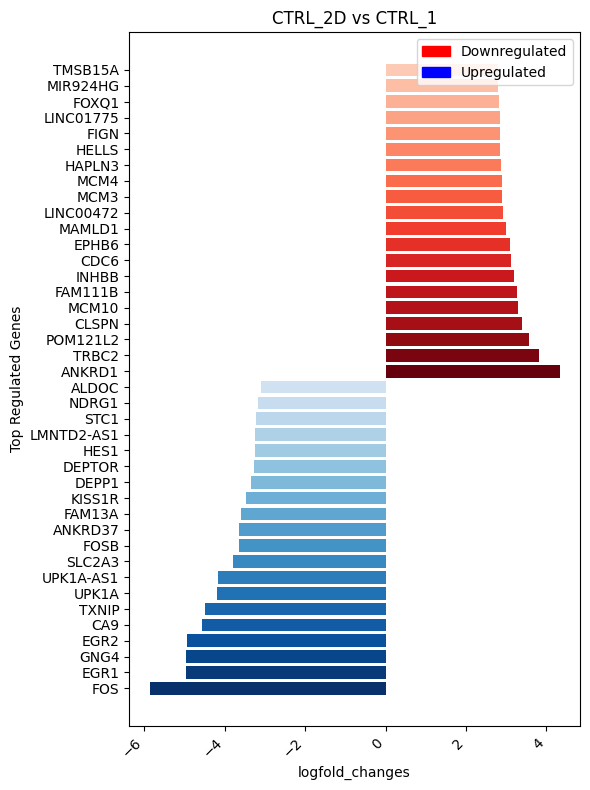

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import os
import numpy as np

# Pfad zur CSV-Datei
csv_file_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
output_folder = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/'

# CSV-Datei einlesen
data = pd.read_csv(csv_file_path)

# Sortieren der Daten nach Expression Value
sorted_upregulated = filtered_deg_data[filtered_deg_data[1] > 0].sort_values(by=1, ascending=False).head(20)
sorted_downregulated = filtered_deg_data[filtered_deg_data[1] < 0].sort_values(by=1, ascending=True).head(20)

# Erstellen eines gemeinsamen Balkendiagramms für hoch- und herunterregulierte Gene
plt.figure(figsize=(6, 8))

# Farbverlauf von Blau zu Weiß für hochregulierte Gene
up_color = plt.cm.get_cmap('Reds')(np.linspace(1, 0.2, len(sorted_upregulated)))

# Farbverlauf von Rot zu Weiß für herunterregulierte Gene
down_color = plt.cm.get_cmap('Blues')(np.linspace(1, 0.2, len(sorted_downregulated)))

# Hochregulierte Gene unten (Farbverlauf von Rot zu Weiß)
plt.barh(sorted_downregulated['gene_name'], sorted_downregulated[1], color=down_color, label='Downregulated')

# Herunterregulierte Gene oben (Farbverlauf von Blau zu Weiß)
plt.barh(sorted_upregulated['gene_name'], sorted_upregulated[1], color=up_color, label='Upregulated')

plt.xlabel('logfold_changes')
plt.ylabel('Top Regulated Genes')
plt.title('CTRL_2D vs CTRL_1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Benutzerdefinierte Legende mit Farbverläufen
up_patch = mpatches.Patch(color='red', label='Downregulated')
down_patch = mpatches.Patch(color='blue', label='Upregulated')
legend = plt.legend(handles=[up_patch, down_patch], loc='upper right')

# Farbverlauf für die Legenden-Einträge
up_legend_color = plt.cm.get_cmap('Blues')(0.5)
down_legend_color = plt.cm.get_cmap('Reds')(0.5)
up_patch.set_color(down_legend_color)
down_patch.set_color(up_legend_color)

# Speichern des Plots im Verzeichnis
combined_plot_path = os.path.join(output_folder, 'top_CTRL_1_vs_CTRL_2D.png')
plt.savefig(combined_plot_path)

# Anzeigen des Plots
plt.show()


In [ ]:

# Erstellen eines gemeinsamen Balkendiagramms für hoch- und herunterregulierte Gene
plt.figure(figsize=(12, 6))

# Farbverlauf von Blau zu Weiß für hochregulierte Gene
up_color = plt.cm.get_cmap('Blues')(np.linspace(0.2, 1, len(sorted_upregulated)))

# Farbverlauf von Rot zu Weiß für herunterregulierte Gene
down_color = plt.cm.get_cmap('Reds')(np.linspace(0.2, 1, len(sorted_downregulated)))

# Hochregulierte Gene (Farbverlauf von Blau zu Weiß)
plt.bar(sorted_upregulated['gene_name'], sorted_upregulated['log2fold'], color=up_color, label='Upregulated')

# Herunterregulierte Gene (Farbverlauf von Rot zu Weiß)
plt.bar(sorted_downregulated['gene_name'], sorted_downregulated['log2fold'], color=down_color, label='Downregulated')


In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import os
import numpy as np

# Pfad zur CSV-Datei
csv_file_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
output_folder = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/'

# CSV-Datei einlesen
data = pd.read_csv(csv_file_path)

# Sortieren der Daten nach Expression Value
sorted_upregulated = data[data[1] > 0].sort_values(by=1, ascending=False).head(20)

# Erstellen des Balkendiagramms für hochregulierte Gene
plt.figure(figsize=(6, 8))

# Farbverlauf von Blau zu Weiß für hochregulierte Gene
up_color = plt.cm.get_cmap('Reds')(np.linspace(1, 0.2, len(sorted_upregulated)))

# Hochregulierte Gene (Farbverlauf von Rot zu Weiß)
plt.barh(sorted_upregulated['gene_name'], sorted_upregulated[1], color=up_color, label='Upregulated')

plt.xlabel('logfold_changes')
plt.ylabel('Top Regulated Genes')
plt.title('CTRL_2D vs CTRL_1 - Top 20 Upregulated Genes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Benutzerdefinierte Legende mit Farbverläufen
up_patch = mpatches.Patch(color='red', label='Upregulated')
legend = plt.legend(handles=[up_patch], loc='upper right')

# Farbverlauf für die Legenden-Einträge
up_legend_color = plt.cm.get_cmap('Reds')(0.5)
up_patch.set_color(up_legend_color)

# Speichern des Plots im Verzeichnis
upregulated_plot_path = os.path.join(output_folder, 'top_upregulated_CTRL_1_vs_CTRL_2D.png')
plt.savefig(upregulated_plot_path)

# Anzeigen des Plots
plt.show()


KeyError: 1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

# Pfad zur CSV-Datei
csv_file_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
output_folder = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/'

# CSV-Datei einlesen
data = pd.read_csv(csv_file_path)

# Sortieren der Daten nach Expression Value
sorted_upregulated = data[data['log2fold'] > 0].sort_values(by='log2fold', ascending=False).head(20)
sorted_downregulated = data[data['log2fold'] < 0].sort_values(by='log2fold', ascending=True).head(20)

# Erstellen eines gemeinsamen horizontalen Balkendiagramms für hoch- und herunterregulierte Gene
plt.figure(figsize=(10, 12))

# Farbverlauf von Blau zu Weiß für hochregulierte Gene
up_color = plt.cm.get_cmap('Blues')(np.linspace(0.2, 1, len(sorted_upregulated)))

# Farbverlauf von Rot zu Weiß für herunterregulierte Gene
down_color = plt.cm.get_cmap('Reds')(np.linspace(0.2, 1, len(sorted_downregulated)))

# Hochregulierte Gene (Farbverlauf von Blau zu Weiß)
plt.barh(sorted_upregulated['gene_name'], sorted_upregulated['log2fold'], color=up_color, label='Upregulated')

# Herunterregulierte Gene (Farbverlauf von Rot zu Weiß)
plt.barh(sorted_downregulated['gene_name'], sorted_downregulated['log2fold'], color=down_color, label='Downregulated')

plt.xlabel('log2fold')
plt.ylabel('Gene Name')
plt.title('CTRL_2D vs CTRL_1     Top 20 Regulated Genes')
plt.tight_layout()
plt.legend()

# Speichern des Plots im Verzeichnis
combined_plot_path = os.path.join(output_folder, 'top_CTRL_1_vs_CTRL_2D_horizontal.png')
plt.savefig(combined_plot_path)

# Anzeigen des Plots
plt.show()
